In [6]:
import pandas as pd

In [3]:
ageinc_df = pd.read_csv("Data/ageinc.csv")
ageinc_df.tail()

,income,age
995,70615,29
996,95102,41
997,42203,35
998,16975,31
999,123857,44


In [4]:
ageinc_df["z_income"] = (ageinc_df["income"] - ageinc_df["income"].mean())/ageinc_df["income"].std()

In [5]:
ageinc_df["z_age"] = (ageinc_df["age"] - ageinc_df["age"].mean())/ageinc_df["age"].std()

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

Text(0,0.5,'Age')

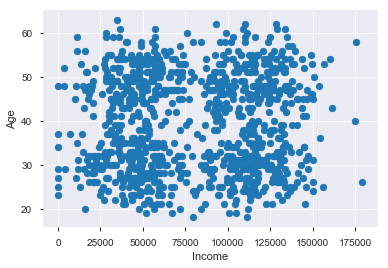

In [11]:
plt.scatter(ageinc_df["income"],ageinc_df["age"])
plt.xlabel("Income")
plt.ylabel("Age")

In [13]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=4, random_state=10)
model.fit(ageinc_df[["z_income","z_age"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [14]:
ageinc_df["cluster"] = model.labels_

In [15]:
ageinc_df.head()

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,2
1,49597,27,-0.777331,-1.130565,3
2,36517,52,-1.110474,1.146963,1
3,33223,49,-1.194372,0.873660,1
4,72994,53,-0.181416,1.238064,1


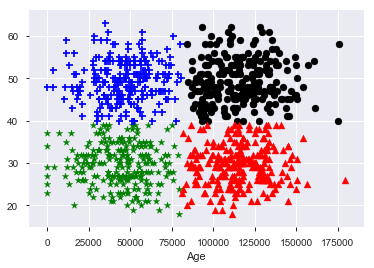

In [22]:
color   = ["r","b","k","g"]
markers = ["^","+","o","*"]

for c in ageinc_df["cluster"].unique():
    d = ageinc_df[ageinc_df["cluster"] == c]
    plt.scatter(d["income"],d["age"], marker =markers[c],
               color = color[c])
    
plt.xlabel("Income")
plt.xlabel("Age")
plt.show()

In [23]:
ageinc_df["cluster"].unique()

array([2, 3, 1, 0])